In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
## sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
#set figure size
plt.rcParams['figure.figsize']=[8,5]


In [4]:
df=pd.read_csv('/kaggle/input/advertisingcsv/Advertising.csv')

In [5]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


Text(0.5, 1.0, 'TV vs Sales')

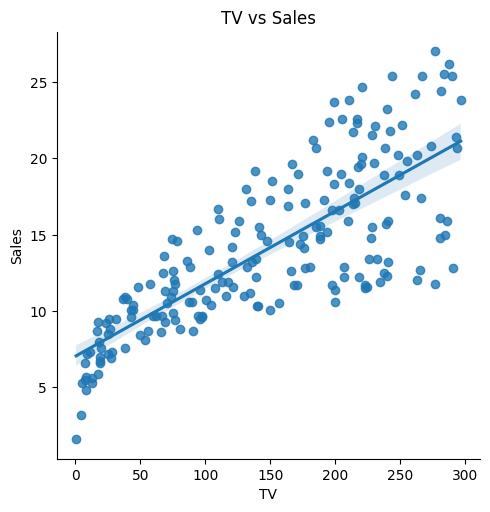

In [6]:
sns.lmplot(x = 'TV',y='Sales',data=df)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('TV vs Sales')

Text(0.5, 1.0, 'Radio vs Sales')

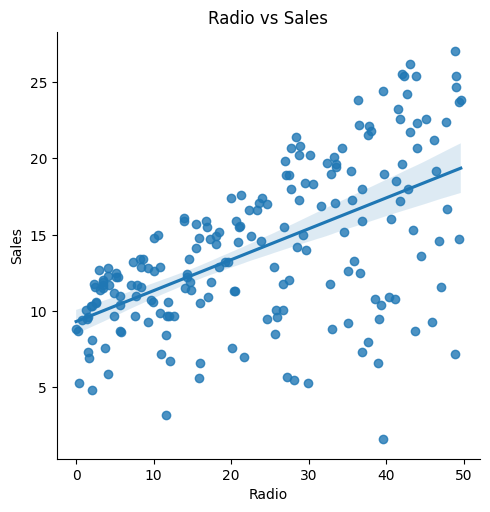

In [8]:
sns.lmplot(x = 'Radio',y='Sales',data=df)
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Radio vs Sales')

Text(0.5, 1.0, 'Newspaper vs Sales')

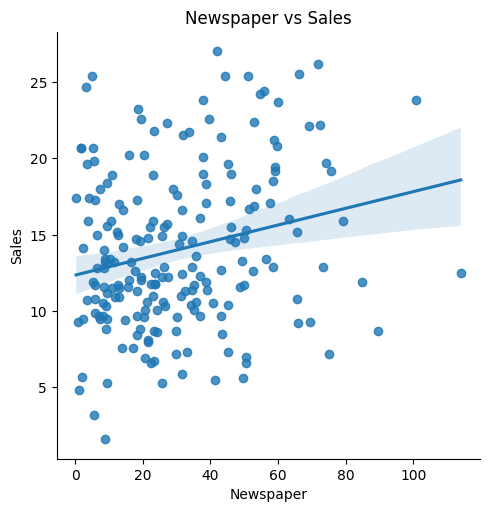

In [9]:
sns.lmplot(x = 'Newspaper',y='Sales',data=df)
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Newspaper vs Sales')

In [12]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [11]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

<Axes: >

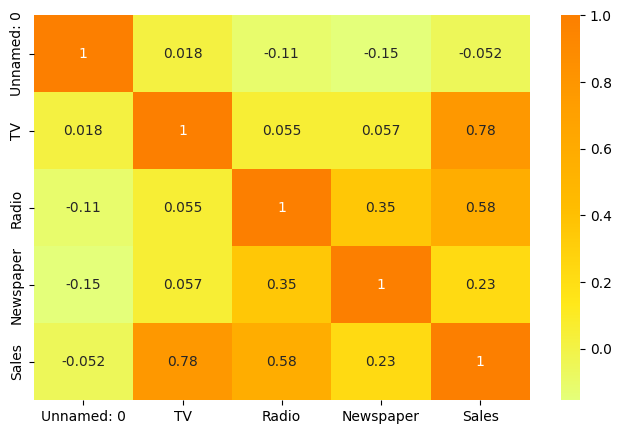

In [10]:
#corelationplot
corr=df.corr(numeric_only=True)
sns.heatmap(corr,cmap='Wistia',annot=True)

<Axes: xlabel='Sales', ylabel='Count'>

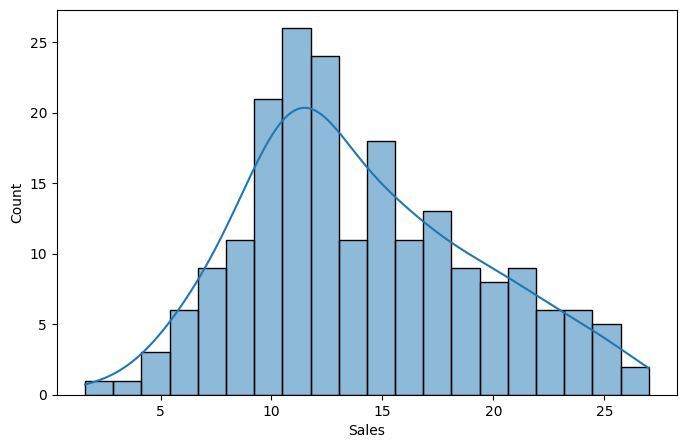

In [13]:
sns.histplot(df['Sales'],kde=True,bins=20)

<Axes: xlabel='Sales', ylabel='Count'>

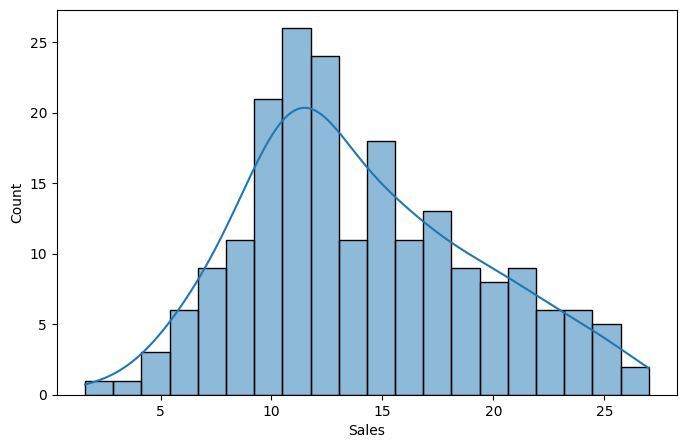

In [14]:
sns.histplot(x='Sales',data=df,kde=True,bins=20)

<Axes: xlabel='Newspaper'>

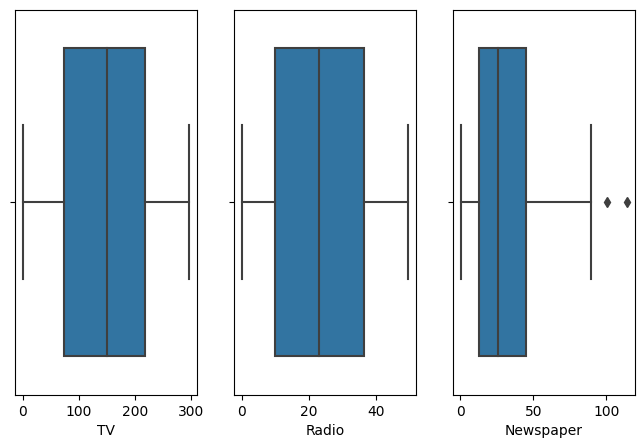

In [17]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)

sns.boxplot(x='TV',hue='Sales',data=df,ax=ax1)
sns.boxplot(x='Radio',hue='Sales',data=df,ax=ax2)
sns.boxplot(x='Newspaper',hue='Sales',data=df,ax=ax3)

In [28]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [31]:
df=df.drop(['Unnamed: 0'],axis=1)

In [32]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [33]:
x = df.drop(['Sales'],axis=1) #input features
y = df['Sales'] #target variable

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=23)

In [35]:
lin_reg = LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [36]:
lin_reg.coef_

array([0.04581911, 0.17727508, 0.00085388])

In [22]:
lin_reg.intercept_

2.86537603234831

In [37]:
y_pred = lin_reg.predict(x_test)

In [38]:
y_pred

array([10.11051724, 21.4901969 , 18.58755569, 13.60167509, 18.23931627,
        6.76034111, 15.22952284, 14.01834584, 23.512387  , 13.82009849,
       20.42076705, 11.61360831,  8.91148844, 14.76176586,  8.39504447,
       15.1826172 , 10.13091697,  8.11983009, 18.97992162,  9.4038216 ,
       24.40776238, 20.35744719, 17.03747355,  6.671045  ,  8.22456346,
       23.11803323, 21.49971095, 15.36945228,  9.32116087, 10.09262169,
       15.71804978,  9.83645507, 13.42979498,  7.23104756, 18.23126005,
       17.66327321,  3.7831835 , 14.29877404, 17.97901782, 17.61040528,
       21.38072439,  7.09351004,  7.4918072 ,  8.75900976, 21.79916861,
       10.52015646, 19.23951037, 20.75519192, 10.65928245, 16.28069597,
        3.70900727,  6.03783418, 16.6349433 , 22.97724443,  9.98219466,
       12.34178992, 17.16595821, 16.21249796,  7.76731159, 20.93805003])

In [39]:
mean_squared_error(y_pred,y_test) 

2.586337457336071

In [40]:
lin_reg.score(x_test,y_test)

0.9266842516167633